In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read + Encoding Data Label

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/S K R I P S I [HASIL]/3. LABELING DATA/DATASET_GDA(labelling).csv')
df

,data_clean,Hasil
0,di gda besok salah award bergengsi korea sel...,Positif
1,gda s dump edisi beli tiket siang sorenya lang...,Positif
2,star yukk all fandom sby acara noraebang acara...,Positif
3,help scam tiket konser gda mengatas namakan or...,Negatif
4,ya allah sedeket tinggal pesen tiket gda pesaw...,Positif
...,...,...
2693,bismillah ikhlas beli tiket gda harga web,Positif
2694,temen update beli tiket gda ngeluhkomplen sosm...,Negatif
2695,harga tiket gda murah takut nyesek wak beli ha...,Negatif
2696,pls ya beli gda tanggal nov pas fest a harga s...,Negatif


Label Encoding

In [3]:
# Inisialisasi LabelEncoder dan transformasi label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Label'] = le.fit_transform(df['Hasil'])
df

,data_clean,Hasil,Label
0,di gda besok salah award bergengsi korea sel...,Positif,1
1,gda s dump edisi beli tiket siang sorenya lang...,Positif,1
2,star yukk all fandom sby acara noraebang acara...,Positif,1
3,help scam tiket konser gda mengatas namakan or...,Negatif,0
4,ya allah sedeket tinggal pesen tiket gda pesaw...,Positif,1
...,...,...,...
2693,bismillah ikhlas beli tiket gda harga web,Positif,1
2694,temen update beli tiket gda ngeluhkomplen sosm...,Negatif,0
2695,harga tiket gda murah takut nyesek wak beli ha...,Negatif,0
2696,pls ya beli gda tanggal nov pas fest a harga s...,Negatif,0


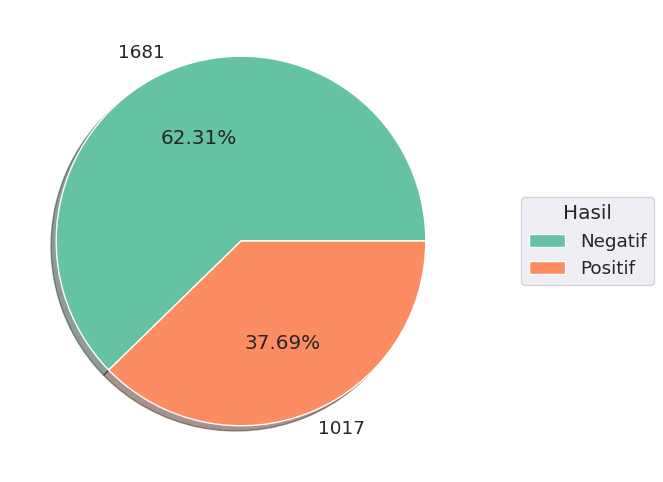

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)
plt.figure(figsize=(7, 6))

# Buat pie chart
wedges, texts, autotexts = plt.pie(
    x=df['Hasil'].value_counts(),
    labels=df['Label'].value_counts(),
    autopct='%1.2f%%',
    colors=sns.color_palette('Set2'),
    shadow=True
)

# Tambahkan legend
plt.legend(wedges, df['Hasil'].value_counts().index, title="Hasil", loc="center", bbox_to_anchor=(1, 0, 0.5, 1))

# Tampilkan pie chart
plt.show()

# SPLIT DATA

In [5]:
# Split data menjadi data train dan data test
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.1, random_state=42) #test size = ukuran data test

# Menampilkan ukuran data latih dan uji
print(f"Ukuran data latih: {len(train_df)}")
print(f"Ukuran data uji: {len(test_df)}")

Ukuran data latih: 2428
Ukuran data uji: 270


<ipython-input-6-269a571a9be3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


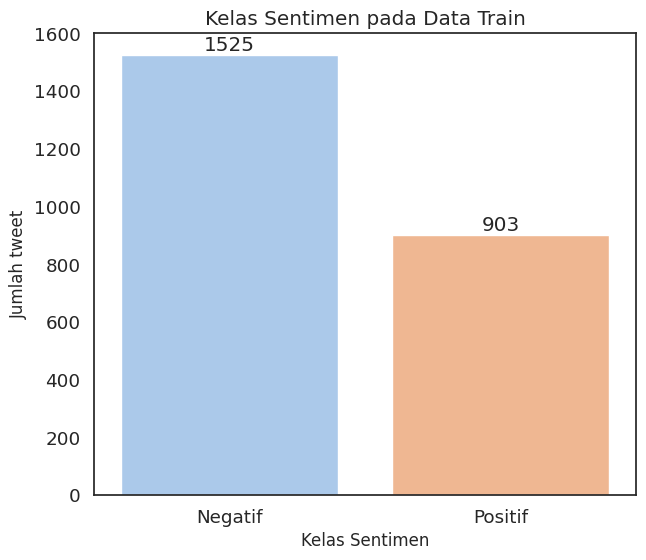

In [6]:
# BAR CHART

# menghitung jumlah setiap label
sentiment_count = train_df['Hasil'].value_counts()

# mengatur gaya plot
sns.set_style('white')

# mengatur bar
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
#plt.title('Jumlah Sentimen K-popers Harga Tiket GDA')
plt.xlabel('Kelas Sentimen', fontsize=12)
plt.ylabel('Jumlah tweet', fontsize=12)

# tambah keterangan label di bar
for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.title("Kelas Sentimen pada Data Train")
plt.show()

# RESAMPLING

In [7]:
# Pisahkan kelas mayoritas dan minoritas pada data train
df_majority_test =test_df[test_df.Label == 0]  # class mayoritas dari label
df_minority_test =test_df[test_df.Label == 1]  # class minoritas dari label

# Menampilkan ukuran data latih dan uji
print(f"Ukuran data negatif data test: {len(df_majority_test)}")
print(f"Ukuran data positif data test: {len(df_minority_test)}")

Ukuran data negatif data test: 156
Ukuran data positif data test: 114


In [8]:
# Pisahkan kelas mayoritas dan minoritas pada data train
df_majority_train = train_df[train_df.Label == 0]  # class mayoritas dari label
df_minority_train = train_df[train_df.Label == 1]  # class minoritas dari label

# Menampilkan ukuran data latih dan uji
print(f"Ukuran data majority data train: {len(df_majority_train)}")
print(f"Ukuran data minority data train: {len(df_minority_train)}")

Ukuran data majority data train: 1525
Ukuran data minority data train: 903


In [9]:
from sklearn.utils import resample

# Lakukan resampling pada data train
df_minority_upsampled = resample(df_minority_train,
                                 replace=True,
                                 n_samples=len(df_majority_train),
                                 random_state=123)

# Gabungkan kembali data train yang sudah di-resample
df_upsampled = pd.concat([df_majority_train, df_minority_upsampled])

# Pisahkan fitur dan label untuk data train dan test
X_train = df_upsampled['data_clean']
y_train = df_upsampled['Label']
X_test = test_df['data_clean']
y_test = test_df['Label']

In [10]:
df_upsampled

,data_clean,Hasil,Label
2339,kmrn lihat harga tiker gda bangkok kaya okelah...,Negatif,0
2175,curiga jungkook gda in jakarta harga tiketnya ...,Negatif,0
802,yaa gda ngumumin nya confirm line up kliatan m...,Negatif,0
1307,diimbau kpopers indo gausah beli tiket gda dah...,Negatif,0
1681,so gda ngasih tiket kemahalan promotor nya kgk...,Negatif,0
...,...,...,...
1121,freebies kim jiwoong ina finding kim jiwoong f...,Positif,1
1837,kasih tiket gda gratis otw langsung,Positif,1
1206,gda jakarta gaada tiket nonton sharing kah di,Positif,1
1324,gda kayanya laku ya dateng venuenya dapet tike...,Positif,1


<ipython-input-11-e8c99639812e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


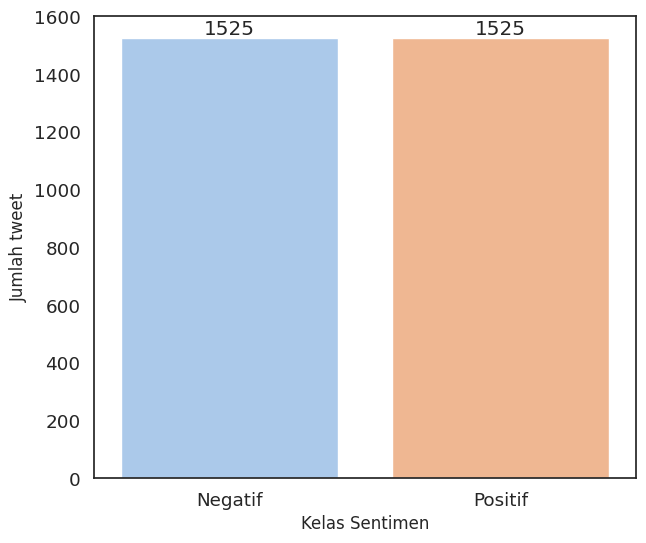

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# BAR CHART

# menghitung jumlah setiap label
sentiment_count = df_upsampled['Hasil'].value_counts()

# mengatur gaya plot
sns.set_style('white')

# mengatur bar
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
#plt.title('Jumlah Sentimen K-popers Harga Tiket GDA')
plt.xlabel('Kelas Sentimen', fontsize=12)
plt.ylabel('Jumlah tweet', fontsize=12)

# tambah keterangan label di bar
for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

In [12]:
# Pastikan jumlah sampel konsisten
assert X_train.shape[0] == y_train.shape[0], "Inconsistent number of samples in X_train and y_train"
assert X_test.shape[0] == y_test.shape[0], "Inconsistent number of samples in X_test and y_test"

# WORD2VEC

In [13]:
from gensim.models import Word2Vec
import numpy as np

# Latih model word2vec
sentences = [text.split() for text in X_train]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1, workers=4) #sg=1 arsitektur skipgram

In [14]:
# Fungsi untuk mendapatkan vektor rata-rata dari kata-kata dalam teks
def get_vector(text, word2vec_model, vector_size):
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(vector_size)

In [15]:
# Vektorisasi data train dan test
X_train_vectors = np.array([get_vector(text, word2vec_model, 100) for text in X_train]) #split lagi yang sudah di vektorisasikan buat masuk ke model
X_test_vectors = np.array([get_vector(text, word2vec_model, 100) for text in X_test])

In [16]:
# Tambahkan kolom hasil 'word2vec' ke DataFrame
df['word2vec'] = df['data_clean'].apply(lambda x: get_vector(x, word2vec_model, 100))
df

,data_clean,Hasil,Label,word2vec
0,di gda besok salah award bergengsi korea sel...,Positif,1,"[-0.13941538, 0.1619151, 0.10688381, 0.0439288..."
1,gda s dump edisi beli tiket siang sorenya lang...,Positif,1,"[-0.123467445, 0.1541087, 0.095334485, 0.05281..."
2,star yukk all fandom sby acara noraebang acara...,Positif,1,"[-0.1609204, 0.17595385, 0.11529747, 0.0583584..."
3,help scam tiket konser gda mengatas namakan or...,Negatif,0,"[-0.1543986, 0.15580392, 0.10441022, 0.0712304..."
4,ya allah sedeket tinggal pesen tiket gda pesaw...,Positif,1,"[-0.13404463, 0.14900124, 0.09497697, 0.067460..."
...,...,...,...,...
2693,bismillah ikhlas beli tiket gda harga web,Positif,1,"[-0.16095805, 0.15897568, 0.08786885, 0.105475..."
2694,temen update beli tiket gda ngeluhkomplen sosm...,Negatif,0,"[-0.13893545, 0.13262883, 0.06986097, 0.088780..."
2695,harga tiket gda murah takut nyesek wak beli ha...,Negatif,0,"[-0.14439546, 0.11498393, 0.056095194, 0.11817..."
2696,pls ya beli gda tanggal nov pas fest a harga s...,Negatif,0,"[-0.16577052, 0.15452318, 0.08468, 0.09641209,..."


# SVM + Evaluasi

In [17]:
from sklearn.svm import SVC

## Kernel Linear

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk kernel linear
param_grid_linear = {
    'C': [0.1, 1, 10, 100, 1000],
}

# Model SVM dengan kernel linear
svm_linear = SVC(kernel='linear')

# Grid Search
grid_search_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5, n_jobs=6, verbose=1)
grid_search_linear.fit(X_train_vectors, y_train)

# Hasil terbaik
print("Best parameters for linear kernel:", grid_search_linear.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for linear kernel: {'C': 1000}


In [ ]:
# Latih model SVM
svm_model_linear = SVC(kernel='linear', C=1000)
svm_model_linear.fit(X_train_vectors, y_train)

# Prediksi dan evaluasi
y_pred_linear = svm_model_linear.predict(X_test_vectors)

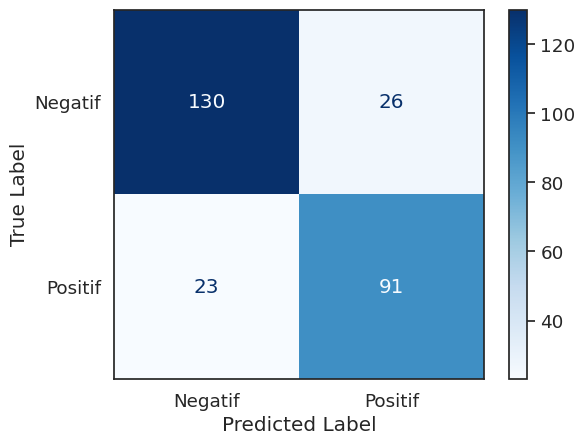

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)

disp = ConfusionMatrixDisplay(cm_linear)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negatif', 'Positif'])
plt.yticks([0, 1], ['Negatif', 'Positif'])
plt.show()

## Kernel RBF

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk kernel rbf
param_grid_rbf = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

# Model SVM dengan kernel rbf
svm_rbf = SVC(kernel='rbf')

# Grid Search
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5, n_jobs=6, verbose=1)
grid_search_rbf.fit(X_train_vectors, y_train)

# Hasil terbaik
print("Best parameters for rbf kernel:", grid_search_rbf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters for rbf kernel: {'C': 1000, 'gamma': 1}


In [ ]:
# Latih model SVM
svm_model_rbf = SVC(kernel='rbf', C=1000, gamma=1)
svm_model_rbf.fit(X_train_vectors, y_train)

# Prediksi dan evaluasi
y_pred_rbf = svm_model_rbf.predict(X_test_vectors)

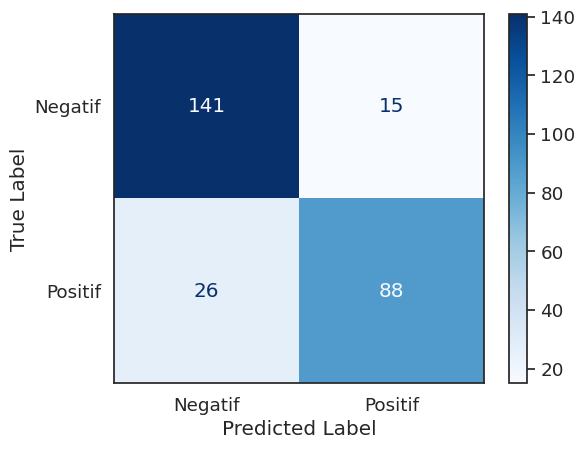

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

disp = ConfusionMatrixDisplay(cm_rbf)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negatif', 'Positif'])
plt.yticks([0, 1], ['Negatif', 'Positif'])
plt.show()

## Kernel Sigmoid

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk kernel sigmoid
param_grid_sigmoid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'coef0': [0.1, 0, 1]
}

# Model SVM dengan kernel sigmoid
svm_sigmoid = SVC(kernel='sigmoid')

# Grid Search
grid_search_sigmoid = GridSearchCV(svm_sigmoid, param_grid_sigmoid, cv=5, n_jobs=6, verbose=1)
grid_search_sigmoid.fit(X_train_vectors, y_train)

# Hasil terbaik
print("Best parameters for sigmoid kernel:", grid_search_sigmoid.best_params_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters for sigmoid kernel: {'C': 1000, 'coef0': 0, 'gamma': 0.01}


In [ ]:
# Latih model SVM
svm_model_sigmoid = SVC(kernel='sigmoid', C=1000, gamma=0.01,coef0=0)
svm_model_sigmoid.fit(X_train_vectors, y_train)

# Prediksi dan evaluasi
y_pred_sigmoid = svm_model_sigmoid.predict(X_test_vectors)

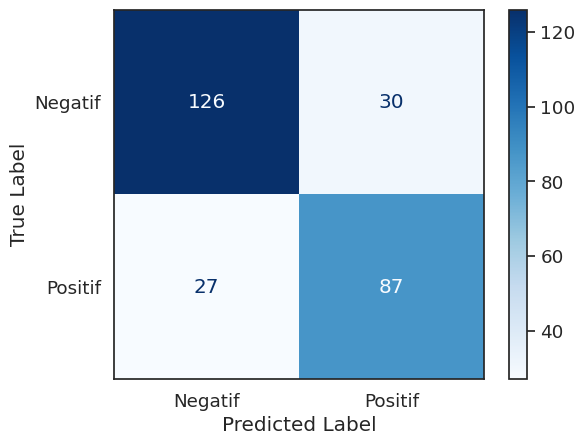

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

disp = ConfusionMatrixDisplay(cm_sigmoid)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negatif', 'Positif'])
plt.yticks([0, 1], ['Negatif', 'Positif'])
plt.show()

## Kernel Polynomial

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definisikan parameter grid
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'coef0': [0.1, 0, 1],
    'degree': [2, 3, 4, 5],
    'kernel': ['poly']
}

grid_search_poly = RandomizedSearchCV(SVC(), param_grid_poly, refit=True, verbose=2, cv=5, n_iter=50, random_state=42)
grid_search_poly.fit(X_train_vectors, y_train)

# Prediksi dan evaluasi
y_pred_poly = grid_search_poly.best_estimator_.predict(X_test_vectors)
print("Best hyperparameters found: ", grid_search_poly.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ...C=0.1, coef0=1, degree=5, gamma=0.1, kernel=poly; total time=   0.6s
[CV] END ...C=0.1, coef0=1, degree=5, gamma=0.1, kernel=poly; total time=   0.6s
[CV] END ...C=0.1, coef0=1, degree=5, gamma=0.1, kernel=poly; total time=   0.6s
[CV] END ...C=0.1, coef0=1, degree=5, gamma=0.1, kernel=poly; total time=   0.4s
[CV] END ...C=0.1, coef0=1, degree=5, gamma=0.1, kernel=poly; total time=   0.4s
[CV] END ......C=10, coef0=1, degree=4, gamma=1, kernel=poly; total time=   1.1s
[CV] END ......C=10, coef0=1, degree=4, gamma=1, kernel=poly; total time=   1.3s
[CV] END ......C=10, coef0=1, degree=4, gamma=1, kernel=poly; total time=   1.1s
[CV] END ......C=10, coef0=1, degree=4, gamma=1, kernel=poly; total time=   1.1s
[CV] END ......C=10, coef0=1, degree=4, gamma=1, kernel=poly; total time=   1.4s
[CV] END .......C=1, coef0=0, degree=5, gamma=1, kernel=poly; total time=   0.8s
[CV] END .......C=1, coef0=0, degree=5, gamma=1

In [18]:
# Latih model SVM
svm_model_poly = SVC(kernel='poly', C=10, gamma=1, coef0=1, degree=4)
svm_model_poly.fit(X_train_vectors, y_train)

# Prediksi dan evaluasi
y_pred_poly = svm_model_poly.predict(X_test_vectors)

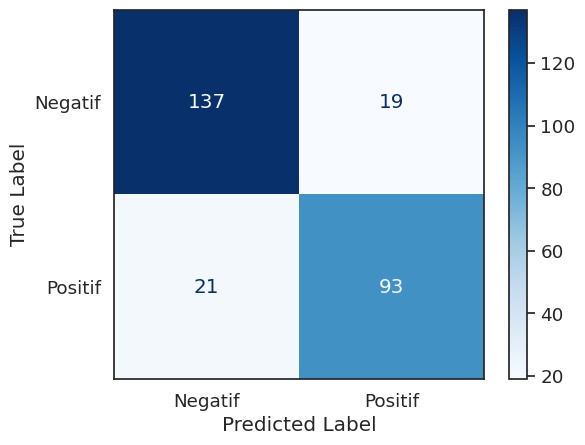

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)

disp = ConfusionMatrixDisplay(cm_poly)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negatif', 'Positif'])
plt.yticks([0, 1], ['Negatif', 'Positif'])
plt.show()

# Predict Sentiment

In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Fungsi untuk memprediksi sentimen teks baru menggunakan model SVM yang berbeda
def predict_sentiment(input_text, svm_model, word2vec_model, vector_size, le):
    tokenized_text = ' '.join(word_tokenize(input_text.lower()))
    input_vector = get_vector(tokenized_text, word2vec_model, vector_size).reshape(1, -1)
    prediction = svm_model.predict(input_vector)
    return le.inverse_transform(prediction)[0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
# Contoh penggunaan fungsi predict_sentiment
input_text = "aduh tolong lah ini mah kemahalan tiket nya, gak bisa beli"
result = predict_sentiment(input_text, svm_model_poly, word2vec_model, 100, le)
print("Predicted sentiment:", result)

Predicted sentiment: Negatif




---


---


---

---



---

Save Model word2vec dan SVM Polynomial

---



In [ ]:
import joblib

# Simpan model ke file
joblib.dump(svm_model_poly, 'svm_model_poly.pkl')

['svm_model_poly.pkl']

In [ ]:
# Simpan model Word2Vec
word2vec_model.save('word2vec_model.bin')



---
.


---



In [ ]:
# Contoh penggunaan fungsi predict_sentiment untuk setiap model SVM
input_text = ""
models = {
    "linear": svm_model_linear,
    "rbf": svm_model_rbf,
    "sigmoid": svm_model_sigmoid,
    "poly": svm_model_poly
}

for model_name, model in models.items():
    result = predict_sentiment(input_text, model, word2vec_model, 100, le)
    print(f"Predicted sentiment using {model_name} kernel: {result}")

Predicted sentiment using linear kernel: Negatif
Predicted sentiment using rbf kernel: Positif
Predicted sentiment using sigmoid kernel: Negatif
Predicted sentiment using poly kernel: Negatif




---
Code end's here


---





---
Code end's here


---



In [ ]:
from nltk.tokenize import word_tokenize

# Fungsi untuk memprediksi sentimen teks baru
def predict_sentiment(input_text, svm_model_poly, word2vec_model, vector_size, le):
    tokenized_text = ' '.join(word_tokenize(input_text.lower()))
    input_vector = get_vector(tokenized_text, word2vec_model, vector_size).reshape(1, -1)
    prediction = svm_model_poly.predict(input_vector)
    return le.inverse_transform(prediction)[0]

In [ ]:
# Contoh penggunaan fungsi predict_sentiment
input_text = ""
result = predict_sentiment(input_text, svm_model_poly, word2vec_model, 100, le)
print("Predicted sentiment:", result)

# VISUALISASI

## Linear

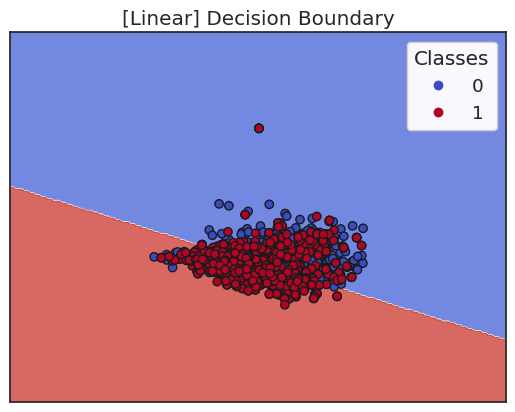

In [ ]:
from sklearn.decomposition import PCA

# Mengurangi dimensi data ke 2D menggunakan PCA
pca = PCA(n_components=2)
X_train_pca_linear = pca.fit_transform(X_train_vectors)
X_test_pca_linear = pca.transform(X_test_vectors)

# Latih ulang SVM pada data 2D
svm_model_pca_linear = SVC(kernel='linear', C=1000)
svm_model_pca_linear.fit(X_train_pca_linear, y_train)

# Plot decision boundary
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

fig, ax = plt.subplots()
plot_decision_boundary(svm_model_pca_linear, X_train_pca_linear, y_train, ax)
plt.title('[Linear] Decision Boundary')
plt.show()

## RBF

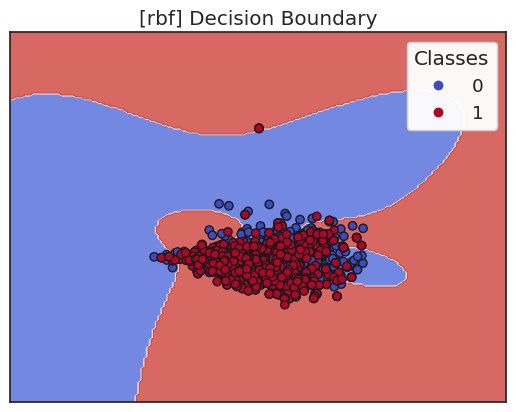

In [ ]:
from sklearn.decomposition import PCA

# Mengurangi dimensi data ke 2D menggunakan PCA
pca = PCA(n_components=2)
X_train_pca_rbf = pca.fit_transform(X_train_vectors)
X_test_pca_rbf = pca.transform(X_test_vectors)

# Latih ulang SVM pada data 2D
svm_model_pca_rbf = SVC(kernel='rbf', C=1000, gamma=1)
svm_model_pca_rbf.fit(X_train_pca_rbf, y_train)

# Plot decision boundary
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

fig, ax = plt.subplots()
plot_decision_boundary(svm_model_pca_rbf, X_train_pca_rbf, y_train, ax)
plt.title('[rbf] Decision Boundary')
plt.show()

## Sigmoid

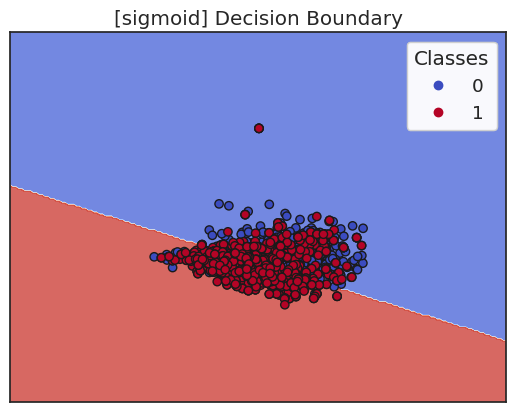

In [ ]:
from sklearn.decomposition import PCA

# Mengurangi dimensi data ke 2D menggunakan PCA
pca = PCA(n_components=2)
X_train_pca_sigmoid = pca.fit_transform(X_train_vectors)
X_test_pca_sigmoid = pca.transform(X_test_vectors)

# Latih ulang SVM pada data 2D
svm_model_pca_sigmoid = SVC(kernel='sigmoid', C=1000, gamma=0.01,coef0=0)
svm_model_pca_sigmoid.fit(X_train_pca_sigmoid, y_train)

# Plot decision boundary
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

fig, ax = plt.subplots()
plot_decision_boundary(svm_model_pca_sigmoid, X_train_pca_sigmoid, y_train, ax)
plt.title('[sigmoid] Decision Boundary')
plt.show()

## Poly

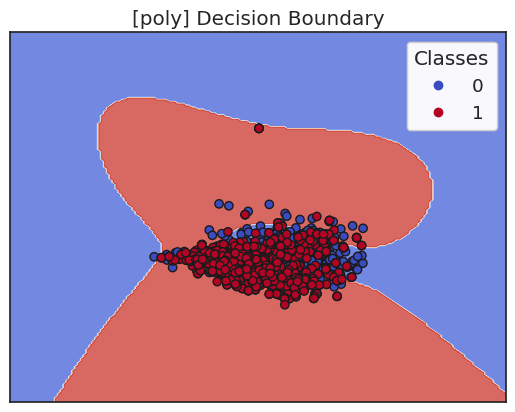

In [ ]:
from sklearn.decomposition import PCA

# Mengurangi dimensi data ke 2D menggunakan PCA
pca = PCA(n_components=2)
X_train_pca_poly = pca.fit_transform(X_train_vectors)
X_test_pca_poly = pca.transform(X_test_vectors)

# Latih ulang SVM pada data 2D
svm_model_pca_poly = SVC(kernel='poly', C=10, gamma=1, coef0=1, degree=4)
svm_model_pca_poly.fit(X_train_pca_poly, y_train)

# Plot decision boundary
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

fig, ax = plt.subplots()
plot_decision_boundary(svm_model_pca_poly, X_train_pca_poly, y_train, ax)
plt.title('[poly] Decision Boundary')
plt.show()